<center><u><H1>Web Scraping</H1></u></center>

In [1]:
import urllib
import re
%matplotlib inline

In [2]:
url = 'https://www.crummy.com/software/BeautifulSoup/bs4/doc/'

In [3]:
web = urllib.request.Request(url)

In [4]:
resp = urllib.request.urlopen(web)

In [5]:
html = resp.read()

In [6]:
print(len(html))

294108


In [7]:
#Let's start an exploratory data analysis cleaning the html tags.
#Splitting the string. # counting only words
tokens = [t for t in html.split()]

In [8]:
print("Total number of tokens:" + str(len(tokens)))

Total number of tokens:22195


In [14]:
print(tokens[:100])

[b'<!DOCTYPE', b'html', b'PUBLIC', b'"-//W3C//DTD', b'XHTML', b'1.0', b'Transitional//EN"', b'"http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">', b'<html', b'xmlns="http://www.w3.org/1999/xhtml">', b'<head>', b'<meta', b'http-equiv="Content-Type"', b'content="text/html;', b'charset=utf-8"', b'/>', b'<title>Beautiful', b'Soup', b'Documentation', b'&mdash;', b'Beautiful', b'Soup', b'4.4.0', b'documentation</title>', b'<link', b'rel="stylesheet"', b'href="_static/classic.css"', b'type="text/css"', b'/>', b'<link', b'rel="stylesheet"', b'href="_static/pygments.css"', b'type="text/css"', b'/>', b'<script', b'type="text/javascript">', b'var', b'DOCUMENTATION_OPTIONS', b'=', b'{', b'URL_ROOT:', b"'./',", b'VERSION:', b"'4.4.0',", b'COLLAPSE_INDEX:', b'false,', b'FILE_SUFFIX:', b"'.html',", b'HAS_SOURCE:', b'true', b'};', b'</script>', b'<script', b'type="text/javascript"', b'src="_static/jquery.js"></script>', b'<script', b'type="text/javascript"', b'src="_static/underscore.js"></scr

In [16]:
#extracting paragraphs with a regular expression:
paragraphs = re.findall(r'<p>(.*?)</p>',str(html))

In [17]:
for p in paragraphs:
    print(p)

<a class="reference external" href="http://www.crummy.com/software/BeautifulSoup/">Beautiful Soup</a> is a\nPython library for pulling data out of HTML and XML files. It works\nwith your favorite parser to provide idiomatic ways of navigating,\nsearching, and modifying the parse tree. It commonly saves programmers\nhours or days of work.
These instructions illustrate all major features of Beautiful Soup 4,\nwith examples. I show you what the library is good for, how it works,\nhow to use it, how to make it do what you want, and what to do when it\nviolates your expectations.
The examples in this documentation should work the same way in Python\n2.7 and Python 3.2.
You might be looking for the documentation for <a class="reference external" href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Beautiful Soup 3</a>.\nIf so, you should know that Beautiful Soup 3 is no longer being\ndeveloped, and that Beautiful Soup 4 is recommended for all new\nprojects. If you want 

In [36]:
#Now let's see the power of nltk
import nltk
from bs4 import BeautifulSoup

In [37]:
#clean will have entire string removing all html tags
soup = BeautifulSoup(html,'html.parser')
text = soup.get_text()

In [38]:
tokens = [t for t in text.split()]
print(tokens[:100])

['Beautiful', 'Soup', 'Documentation', '—', 'Beautiful', 'Soup', '4.4.0', 'documentation', 'var', 'DOCUMENTATION_OPTIONS', '=', '{', 'URL_ROOT:', "'./',", 'VERSION:', "'4.4.0',", 'COLLAPSE_INDEX:', 'false,', 'FILE_SUFFIX:', "'.html',", 'HAS_SOURCE:', 'true', '};', 'Navigation', 'index', 'Beautiful', 'Soup', '4.4.0', 'documentation', '»', 'Beautiful', 'Soup', 'Documentation¶', 'Beautiful', 'Soup', 'is', 'a', 'Python', 'library', 'for', 'pulling', 'data', 'out', 'of', 'HTML', 'and', 'XML', 'files.', 'It', 'works', 'with', 'your', 'favorite', 'parser', 'to', 'provide', 'idiomatic', 'ways', 'of', 'navigating,', 'searching,', 'and', 'modifying', 'the', 'parse', 'tree.', 'It', 'commonly', 'saves', 'programmers', 'hours', 'or', 'days', 'of', 'work.', 'These', 'instructions', 'illustrate', 'all', 'major', 'features', 'of', 'Beautiful', 'Soup', '4,', 'with', 'examples.', 'I', 'show', 'you', 'what', 'the', 'library', 'is', 'good', 'for,', 'how', 'it', 'works,', 'how']


## Calculating the frequency distribution

In [21]:
import operator

In [22]:
freq={}
for i in tokens:
    if i in freq:
        freq[i] += 1
    else:
        freq[i] = 1

In [23]:
#sorting the dictionary of values:
sorted_freq = sorted(freq.items(), key=operator.itemgetter(1),reverse=True)

In [24]:
print(sorted_freq[:30])

[('the', 598), ('#', 512), ('a', 385), ('to', 240), ('and', 223), ('of', 206), ('you', 200), ('in', 160), ('Beautiful', 152), ('is', 145), ('=', 143), ('Soup', 136), ('that', 128), ('tag', 122), ('class="sister"', 111), ('can', 97), ('The', 92), ('<a', 92), ('it', 90), ('for', 84), ('or', 84), ('If', 84), ('as', 82), ('document', 76), ('but', 63), ('with', 61), ('You', 61), ("Dormouse's", 61), ('an', 57), ('are', 54)]


## Using NLTK

In [25]:
freq_nltk = nltk.FreqDist(tokens)

In [26]:
print(freq_nltk)

<FreqDist with 3175 samples and 13921 outcomes>


In [27]:
freq_nltk.most_common(20)

[('the', 598),
 ('#', 512),
 ('a', 385),
 ('to', 240),
 ('and', 223),
 ('of', 206),
 ('you', 200),
 ('in', 160),
 ('Beautiful', 152),
 ('is', 145),
 ('=', 143),
 ('Soup', 136),
 ('that', 128),
 ('tag', 122),
 ('class="sister"', 111),
 ('can', 97),
 ('The', 92),
 ('<a', 92),
 ('it', 90),
 ('for', 84)]

In [28]:
freq_nltk['Beautiful']

152

## Plotting the frequency:

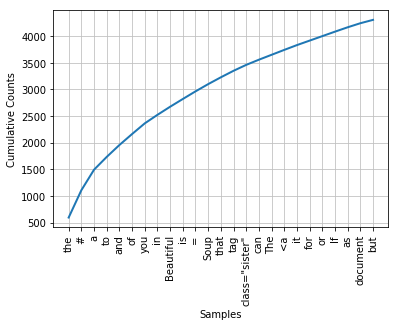

In [29]:
freq_nltk.plot(25, cumulative=True) # cumulative is suppose to be False

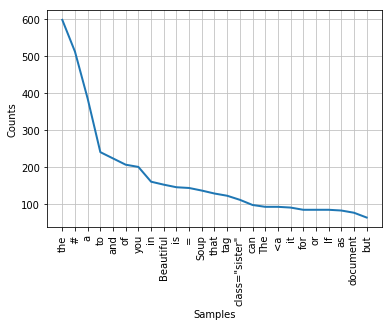

In [30]:
freq_nltk.plot(25, cumulative=False) # this is the right way of plotting

## Removing stop words: 

In [31]:
#Stop words are useless words like the, a, in, an, or and so on.
stopwords = [word.strip().lower() for word in open("../Data/ENstopwords.txt")]

In [32]:
clean_ = [t for t in tokens if len(t.lower())>1 and (t.lower() not in stopwords)]

In [33]:
_freq_nltk = nltk.FreqDist(clean_)

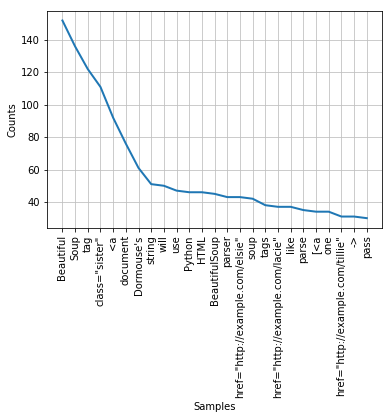

In [34]:
_freq_nltk.plot(25, cumulative=False)

In [35]:
_freq_nltk.most_common(20)

[('Beautiful', 152),
 ('Soup', 136),
 ('tag', 122),
 ('class="sister"', 111),
 ('<a', 92),
 ('document', 76),
 ("Dormouse's", 61),
 ('string', 51),
 ('will', 50),
 ('use', 47),
 ('Python', 46),
 ('HTML', 46),
 ('BeautifulSoup', 45),
 ('parser', 43),
 ('href="http://example.com/elsie"', 43),
 ('soup', 42),
 ('tags', 38),
 ('href="http://example.com/lacie"', 37),
 ('like', 37),
 ('parse', 35)]